# Evolution of photon and relativistic densities

In [2]:
from astropy import units as u
from astropy import constants as const
from scipy.special import zeta
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rho_crit = 8.62e-27 * u.kg / (u.m **3)
omega_M = 0.301
omega_b = 0.0497
omega_gamma = 5.51e-5

* Calculate the photon-to-baryon ratio $\eta$. You can assume that the baryons consist of
protons.

First we calculate $\rho_0 = \Omega * \rho_{crit}$

In [6]:
rho_M_0 = omega_M * rho_crit
rho_b_0 = omega_b * rho_crit
rho_gamma_0 = omega_gamma * rho_crit

The proton density we get easily using the proton mass $m_p$: $$n_{p} = \frac{\rho_{b,0}}{m_p} $$.

In [7]:
n_proton = rho_b_0 / const.m_p 
n_proton

<Quantity 0.2561332 1 / m3>

The photon desnity we can get using the average energy of particles in a blackbody
$$ u(T) = \frac{\pi^4}{15 \cdot 2 \zeta(3)} \cdot k_B \cdot T $$.
The number density is then 
$$ n_\gamma =  \frac{\rho_{\gamma, 0}}{u(T_{CMB}) \cdot c^{-2}}$$ with $T_{CMB} = 2.7 K$.

In [5]:
def average_photon_energy(T):
    return np.pi**4 / (15 * 2*zeta(3)) * const.k_B * T

def energy_to_mass(E):
    return E / const.c**2

def average_photon_mass(T):
    return energy_to_mass(average_photon_energy(T))

T0 = 2.7 * u.K
n_gamma = rho_gamma_0 / average_photon_mass(T0) 
n_gamma.to('m-3')

<Quantity 4.23935723e+08 1 / m3>

Alternatively we could use our result from exercise sheet 2:
$$ n_\gamma (T) = \frac{2\zeta(3)}{\pi^2} \left( \frac{k_b}{\hbar c} \right)^3 T^3$$

In [6]:
def photon_number_density(T):
    return 2*zeta(3) /np.pi**2 * (const.k_B / (const.hbar * const.c))**3 * T**3

photon_number_density(T0)

<Quantity 3.9930599e+08 1 / m3>

We can than calculate $\eta = n_\gamma / n_b = n_\gamma / n_p$

In [7]:
eta = n_gamma.to('m-3') / n_proton
eta

<Quantity 1.65513775e+09>

* How does $\eta$ evolve with redshift?

$$\eta = \frac{n_\gamma}{n_b}$$

$$ n_b \sim \rho_b(z) \sim (1+z)^3 $$

$$ n_\gamma \sim T^3 \sim (1+z)^3$$

$\rightarrow$ $\eta$ does not evolve with redshift

* Study the evolution of $\rho_M$ , $\rho_b$ and $\rho_\gamma$ with redshift. At which redshift would the photons come to dominate?

First we define functions to calculate the densities as functions of redshift.

In [8]:
def rho_M(z):
    return rho_M_0 * (1+z)**3

def rho_b(z):
    return rho_b_0 * (1+z)**3

def rho_gamma(z):
    return rho_gamma_0 * (1+z)**4

We then find the intersection of $\rho_\gamma$ with $\rho_M$ and $\rho_b$.

In [9]:
def rootfunc_gamma_over_M(z):
    return rho_gamma(z) - rho_M(z)

gamma_over_M = root(rootfunc_gamma_over_M, 7000).x[0]
print(f'gamma dominates over matter at z={gamma_over_M:.2f}')

def rootfunc_gamma_over_b(z):
    return rho_gamma(z) - rho_b(z)

gamma_over_b = root(rootfunc_gamma_over_b, 1000).x[0]
print(f'gamma dominates over baryonic matter at z={gamma_over_b:.2f}')

gamma dominates over matter at z=5461.79
gamma dominates over baryonic matter at z=901.00


Let's plot these results

In [10]:
redshifts = np.linspace(gamma_over_b-500, gamma_over_M+500, 1000)

plot_rho_M     = rho_M(redshifts)
plot_rho_b     = rho_b(redshifts)
plot_rho_gamma = rho_gamma(redshifts)

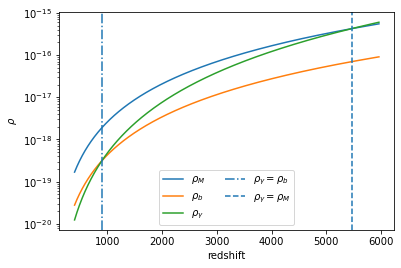

In [11]:
fig, ax = plt.subplots()

labels = [r'$\rho_M$', r'$\rho_b$', r'$\rho_\gamma$']
rhos   = [plot_rho_M, plot_rho_b, plot_rho_gamma]

for label, rho in zip(labels, rhos):
    ax.plot(redshifts, rho, label=label)
    
ax.axvline(gamma_over_b, label=r'$\rho_\gamma = \rho_b$', ls='-.')
ax.axvline(gamma_over_M, label=r'$\rho_\gamma = \rho_M$', ls='--')
    
ax.set_xlabel('redshift')
ax.set_ylabel(r'$\rho$')
ax.legend(ncol=2)
ax.set_yscale('log')

plt.show()
plt.close()

* We know of at least one more relativistic species, neutrinos, such that the total contribution from relativistic particles is $\Omega_{rel} \geq 8.24 \cdot 10 ^{-5}$. At which redshifts did this relativistic component come to dominate over matter?

In [12]:
omega_rel = 8.24e-5
rho_rel_0 = omega_rel * rho_crit


def rho_relativistic(z):
    return rho_rel_0 * (1+z)**4
    
def rootfunc_rel_over_M(z):
    return rho_relativistic(z) - rho_M(z)

rel_over_M = root(rootfunc_rel_over_M, 5000).x[0]
print(f'Taking neutrinos into account, relativistic particles dominate over matter at z={rel_over_M:.2f}')
print(f'That is {rel_over_M - gamma_over_M:.2f} difference to photons alone.')

Taking neutrinos into account, relativistic particles dominate over matter at z=3651.91
That is -1809.88 difference to photons alone.
